# Mushroom Project

# Description

# Importing the required libraries

In [104]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset and Data Preparation

In [14]:
df=pd.read_csv('mushroom.csv',names=range(0,23))
df = pd.DataFrame(data=df)
df

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [15]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [16]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [17]:
df.shape

(8124, 23)

In [19]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       8124 non-null   object
 1   1       8124 non-null   object
 2   2       8124 non-null   object
 3   3       8124 non-null   object
 4   4       8124 non-null   object
 5   5       8124 non-null   object
 6   6       8124 non-null   object
 7   7       8124 non-null   object
 8   8       8124 non-null   object
 9   9       8124 non-null   object
 10  10      8124 non-null   object
 11  11      8124 non-null   object
 12  12      8124 non-null   object
 13  13      8124 non-null   object
 14  14      8124 non-null   object
 15  15      8124 non-null   object
 16  16      8124 non-null   object
 17  17      8124 non-null   object
 18  18      8124 non-null   object
 19  19      8124 non-null   object
 20  20      8124 non-null   object
 21  21      8124 non-null   object
 22  22      8124 non-null   

In [21]:
df.dtypes

0     object
1     object
2     object
3     object
4     object
5     object
6     object
7     object
8     object
9     object
10    object
11    object
12    object
13    object
14    object
15    object
16    object
17    object
18    object
19    object
20    object
21    object
22    object
dtype: object

In [23]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
dtype: int64

In [32]:
df[0].value_counts()

e    4208
p    3916
Name: 0, dtype: int64

In [129]:
df[1].value_counts()

x    3656
f    3152
k     828
b     452
s      32
c       4
Name: 1, dtype: int64

# Data visualizations

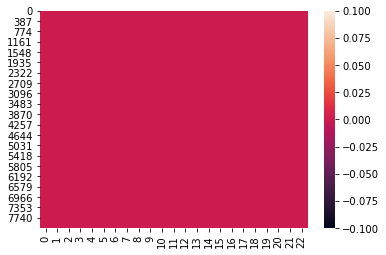

In [35]:
sn.heatmap(df.isnull())

# To check Correlation ?

In [50]:
sn.color_palette?

In [51]:
sn.heatmap?

In [54]:
df.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22],
           dtype='int64')

In [58]:
collist=df.columns.values
ncol=12
nrows=10

In [59]:
plt.subplot?

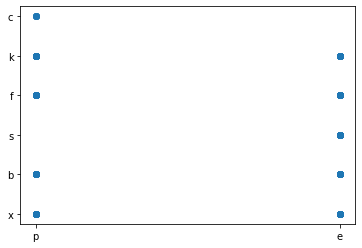

In [66]:
#bivariate analysis
plt.scatter(df[0],df[1])

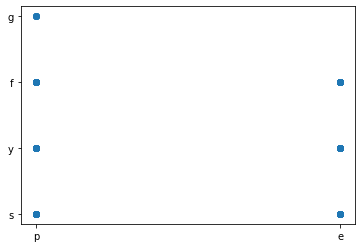

In [69]:
plt.scatter(df[0],df[2])
plt.show()

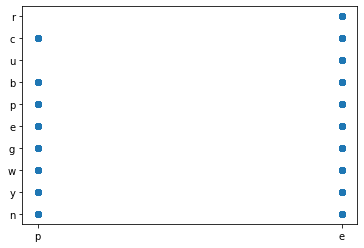

In [70]:
plt.scatter(df[0],df[3])
plt.show()

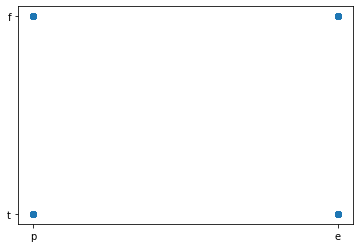

In [71]:
plt.scatter(df[0],df[4])
plt.show()

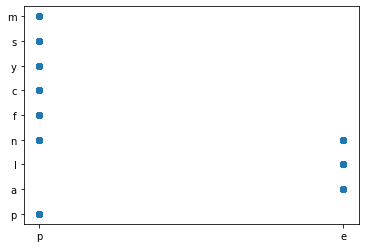

In [72]:
plt.scatter(df[0],df[5])
plt.show()

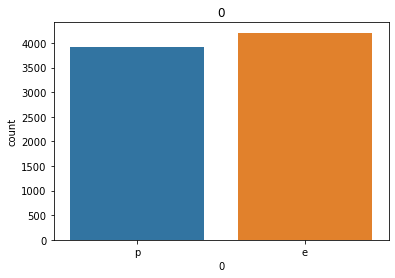

In [73]:
sn.countplot(df[0])
plt.title(0)
plt.show()

In [75]:
df.shape

(8124, 23)

# Removing Outliers ?

In [83]:
from scipy.stats import zscore

In [85]:
df.skew()

Series([], dtype: float64)

In [219]:
y=df.iloc[:,0]
y

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: 0, Length: 8124, dtype: object

In [221]:
#label encoder to change Rock and Mine to 1 amd 0
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
y

array([1, 0, 0, ..., 0, 1, 0])

In [220]:
x = df.iloc[:,1:23]
x

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
0,5,2,4,1,6,1,0,1,6,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,6,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,7,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,7,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,6,1,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,3,0,...,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,3,0,...,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,7,0,...,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2


In [222]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.22,random_state=45)

In [223]:
lr=LogisticRegression()

In [224]:
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.9552572706935123
[[891  43]
 [ 37 817]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       934
           1       0.95      0.96      0.95       854

    accuracy                           0.96      1788
   macro avg       0.96      0.96      0.96      1788
weighted avg       0.96      0.96      0.96      1788



In [225]:
rf = RandomForestClassifier()

rf.fit(x_train,y_train)
rf.score(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

1.0
[[934   0]
 [  0 854]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       934
           1       1.00      1.00      1.00       854

    accuracy                           1.00      1788
   macro avg       1.00      1.00      1.00      1788
weighted avg       1.00      1.00      1.00      1788



In [226]:
ad = AdaBoostClassifier()

ad.fit(x_train,y_train)
ad.score(x_train,y_train)
predad=ad.predict(x_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

1.0
[[934   0]
 [  0 854]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       934
           1       1.00      1.00      1.00       854

    accuracy                           1.00      1788
   macro avg       1.00      1.00      1.00      1788
weighted avg       1.00      1.00      1.00      1788



In [230]:
lr.fit(x_train,y_train)

LogisticRegression()

In [233]:
x.shape

(8124, 22)

In [235]:
x_train.shape

(6336, 22)

In [236]:
y.shape

(8124,)

In [250]:
y=y.reshape(-1,1)
y.shape

(8124, 1)

In [251]:
y_train=y.reshape(-1,1)
y_train.shape

(8124, 1)

In [252]:
pred=lr.predict(x_test)
print(pred)

[0 0 1 ... 0 1 1]


In [254]:
print(confusion_matrix(y_test,pred))

[[891  43]
 [ 37 817]]


In [255]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       934
           1       0.95      0.96      0.95       854

    accuracy                           0.96      1788
   macro avg       0.96      0.96      0.96      1788
weighted avg       0.96      0.96      0.96      1788



In [258]:
df1=pd.DataFrame(predad)
df1.to_csv('ad_predicton.csv')